In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hazardous-neos-nearest-earth-objects/nearest-earth-objects(1910-2024).csv


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/kaggle/input/hazardous-neos-nearest-earth-objects/nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [49]:
df = df.drop(['neo_id', 'name'] , axis = 1)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [50]:
hazardous_labels = pd.get_dummies(df['is_hazardous'], dtype=int)
hazardous_labels

,False,True
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
338194,1,0
338195,1,0
338196,1,0
338197,1,0


In [51]:
df = pd.concat([df, hazardous_labels], axis = 1)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,False,True
0,19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False,1,0
1,18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True,0,1
2,21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False,1,0
3,20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False,1,0
4,22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False,1,0


In [52]:
df = df.drop(['orbiting_body'], axis = 1)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,False,True
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False,1,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True,0,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False,1,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False,1,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False,1,0


In [53]:
df = df.drop([False], axis = 1)

In [54]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,True
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False,0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.dropna()

features = ['estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
X = df[features]
y = df['is_hazardous']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

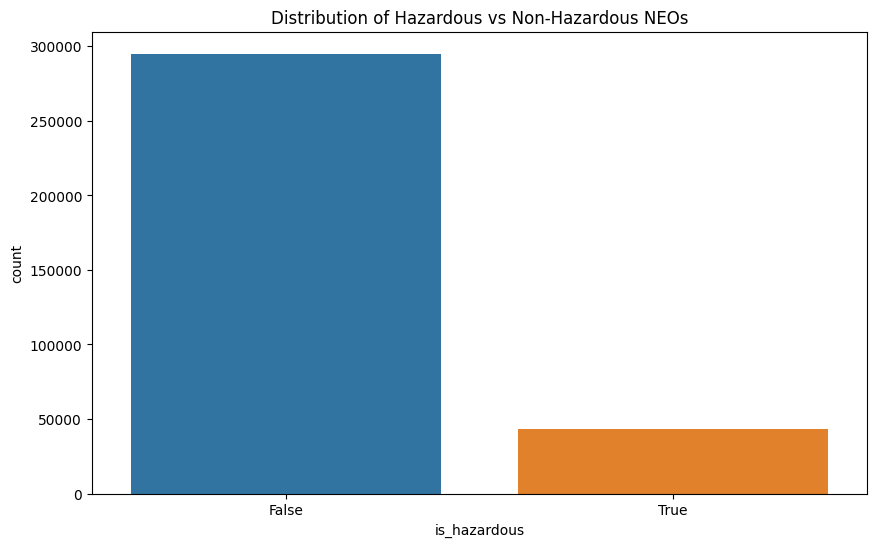

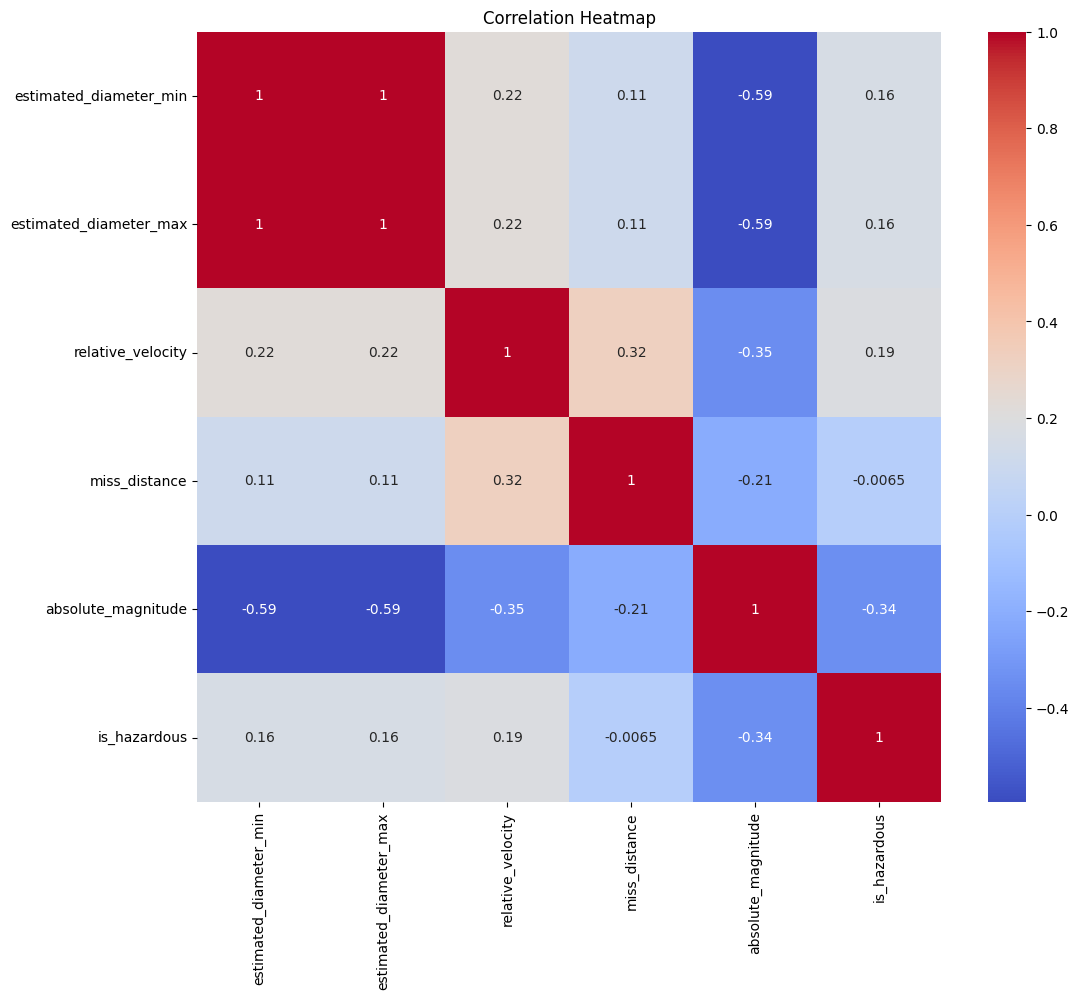

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[features + ['is_hazardous']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.87
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     59088
        True       0.48      0.07      0.13      8547

    accuracy                           0.87     67635
   macro avg       0.68      0.53      0.53     67635
weighted avg       0.83      0.87      0.83     67635



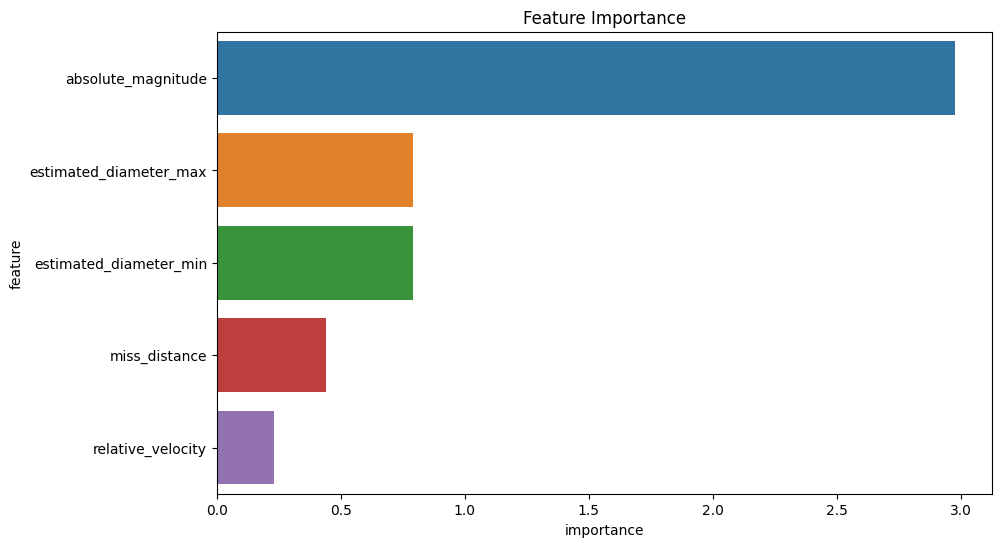

In [58]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


feature_importance = pd.DataFrame({'feature': features, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()